# Visualizing FordGoBike Data(2017)

## Investigation Overview

> In this investigation of the Ford GoBike System, I wanted to look at the most common customer behaviors and characteristics.

## Dataset Overview

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#import dataset
df_clean = pd.read_csv(r'C:\Users\User\Desktop\p5\fordgo_master_clean.csv')
df_clean

duration_sec               start_time                 end_time  \
0              80110  2017-12-31 16:57:39.654  2018-01-01 15:12:50.245   
1              78800  2017-12-31 15:56:34.842  2018-01-01 13:49:55.617   
2              45768  2017-12-31 22:45:48.411  2018-01-01 11:28:36.883   
3              62172  2017-12-31 17:31:10.636  2018-01-01 10:47:23.531   
4              43603  2017-12-31 14:23:14.001  2018-01-01 02:29:57.571   
...              ...                      ...                      ...   
519695           435  2017-06-28 10:00:54.528  2017-06-28 10:08:10.438   
519696           431  2017-06-28 09:56:39.631  2017-06-28 10:03:51.090   
519697           424  2017-06-28 09:47:36.347  2017-06-28 09:54:41.187   
519698           366  2017-06-28 09:47:41.664  2017-06-28 09:53:47.715   
519699           188  2017-06-28 09:49:46.377  2017-06-28 09:52:55.338   

        start_station_id                                 start_station_name  \
0                     74                              Laguna St at Hayes St   
1                    284  Yerba Buena Center for the Arts (Howard St at ...   
2                    245                             Downtown Berkeley BART   
3                     60                               8th St at Ringold St   
4                    239                      Bancroft Way at Telegraph Ave   
...                  ...                                                ...   
519695                81                                 Berry St at 4th St   
519696                66                              3rd St at Townsend St   
519697                21   Montgomery St BART Station (Market St at 2nd St)   
519698                58                               Market St at 10th St   
519699                25                                Howard St at 2nd St   

        start_station_latitude  start_station_longitude  end_station_id  \
0                    37.776435              -122.426244              43   
1                    37.784872              -122.400876              96   
2                    37.870348              -122.267764             245   
3                    37.774520              -122.409449               5   
4                    37.868813              -122.258764             247   
...                        ...                      ...             ...   
519695               37.775880              -122.393170              45   
519696               37.778742              -122.392741             321   
519697               37.789625              -122.400811              48   
519698               37.776619              -122.417385              59   
519699               37.787522              -122.397405              48   

                                         end_station_name  \
0       San Francisco Public Library (Grove St at Hyde...   
1                                   Dolores St at 15th St   
2                                  Downtown Berkeley BART   
3            Powell St BART Station (Market St at 5th St)   
4                               Fulton St at Bancroft Way   
...                                                   ...   
519695                                5th St at Howard St   
519696                                      5th at Folsom   
519697                                2nd St at S Park St   
519698                        S Van Ness Ave at Market St   
519699                                2nd St at S Park St   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
0                  37.778768            -122.415929       96    Customer   
1                  37.766210            -122.426614       88    Customer   
2                  37.870348            -122.267764     1094    Customer   
3                  37.783899            -122.408445     2831    Customer   
4                  37.867789            -122.265896     3167  Subscriber   
...                      ...                    ...      ...         ...   
5196

## Ford GoBike Usage by Month

> The number of trips reaches peak during the month of October. The number of trips are the least during the month of June and it raises greatly until October , where it sees the peak and then a gradually decrease in the next two months.

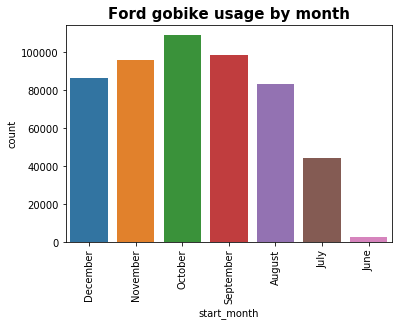

In [3]:
# Monthly usage of the Ford Go Bike system

sorted_counts = df_clean['start_month'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width':0.4})
plt.title('Ford gobike usage by month', fontsize=15, fontweight='bold')
plt.axis('square')

fig = plt.figure()
ax = fig.add_axes([0.125,0.125,0.755,0.755])
plt.title('Ford gobike usage by month', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
sb.countplot(data=df_clean, x = 'start_month', ax=ax)

## Ford GoBike Usage by Hour

> The bikes usage seem to reach the peak during the hours 8 ( 8A.M.) and 17 (5 P.M.) , which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuting to and from the house to the office. 

In [4]:
# Hourly usage of the Ford Go Bike System
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.xticks(range(0,25))
sb.distplot(df_clean['start_time_hour'])

plt.subplot(1,2,2)
plt.xticks(range(0,25))
sb.distplot(df_clean['end_time_hour'])

## Ford GoBike System Trends by User Type

>The plot shows that the customers have a relatively low usage of the bike share system during the weekdays with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

In [5]:
plt.figure(figsize=[16, 6])

# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.subplot(1,2,2)
sb.countplot(data=df_clean, x='start_day', hue='user_type')
plt.title("Daily usage", y=1, fontsize=15, fontweight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Number of bike trips')

# pie chart
plt.subplot(1, 2, 1)
sorted_vals = df_clean.user_type.value_counts()/df_clean.shape[0]
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=True, autopct='%1.1f%%', shadow=True)
plt.title("Customers vs Subscribers", y=1, fontsize=15, fontweight='bold')
plt.axis('square')

plt.suptitle('User Types and Their distribution statistics', fontsize=18, fontweight='bold', y=1);

## Ford Go Bike System - Duration (Min) by User Type

> It seems that majority of the trips are less than 15 minutes. The average trip is under 12.5 minutes. Most rides fall in between the 3 - 11 minute range. This might suggests riders are taking the bikes only for short distances. 

Text(0, 0.5, 'Trip Duration in Minute')

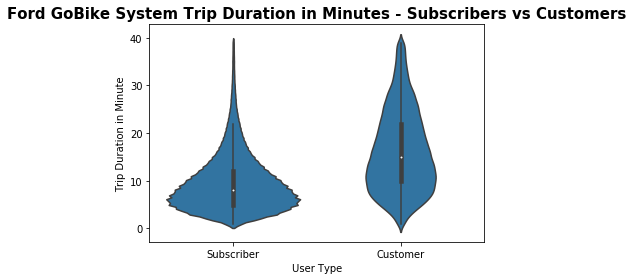

In [6]:
# Violin plot to compare the subscribes and the customers based on Trip duration (min)
base_color = sb.color_palette()[0]
data = df_clean.query('duration_min < 40')
sb.violinplot(data=data, x='user_type', y='duration_min', color=base_color,inner='box')
plt.title("Ford GoBike System Trip Duration in Minutes - Subscribers vs Customers", y=1, fontsize=15, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Trip Duration in Minute')

## Ford Go Bike System - User distribution around the country

>The number of users of the Ford Gobike system is rather split in 3 different areas. After considering the longitude and latitude, the users are mainly in the cities of San Francisco, East Bay and San Jose.

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10, 5])
data = (df_clean[df_clean.start_station_longitude < -120].
        groupby(['start_station_latitude', 'start_station_longitude']).count().reset_index())
plt.title("Ford GoBike System users location", y=1, fontsize=15, fontweight='bold')
plt.scatter(x=data.start_station_longitude, y=data.start_station_latitude, alpha=0.5)

## Ford GoBike System - Summary

> The number of trips peaked around 8-9am and 17-18pm during a day, there were more trips on work days (Mon-Fri). The riding trips tend to be shorter on Monday through Friday compared to weekends. There are a lot more subscriber usage than customers overall. The riding habit/pattern varies a lot between subscribers and customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area. Different usage pattern/habit between the two type of riders are seen from the exploration.

In [10]:

!jupyter nbconvert --to slides --TemplateExporter.exclude_input=True C:\Users\User\Desktop\p5\CommunicateData_SlideDeck.ipynb

[NbConvertApp] Converting notebook C:\Users\User\Desktop\p5\CommunicateData_SlideDeck.ipynb to slides
[NbConvertApp] Writing 472793 bytes to C:\Users\User\Desktop\p5\CommunicateData_SlideDeck.slides.html
